In the task 1 we perform data cleaning by removing missing values and outliers. We use tatanic dataset for this task . Titanic dataset has 2 tables train and test.

### Test Table

In [ ]:
# import data
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
# import libriries
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# identify null values
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# deal with null values
data['Age'].fillna(data['Age'].median(), inplace=True)
data.dropna(subset=['Fare'], inplace=True)
data.drop(columns=['Cabin'], inplace=True)
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

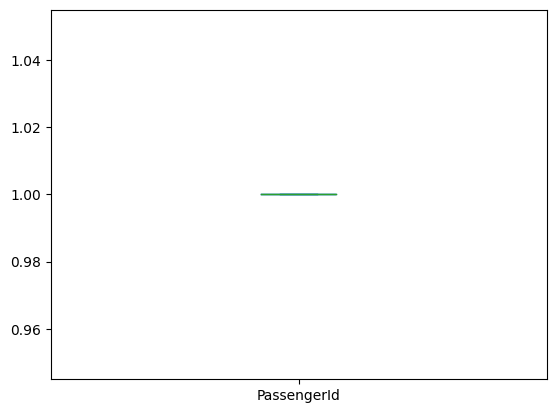

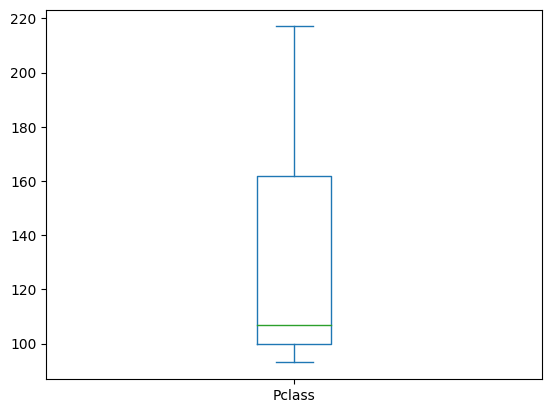

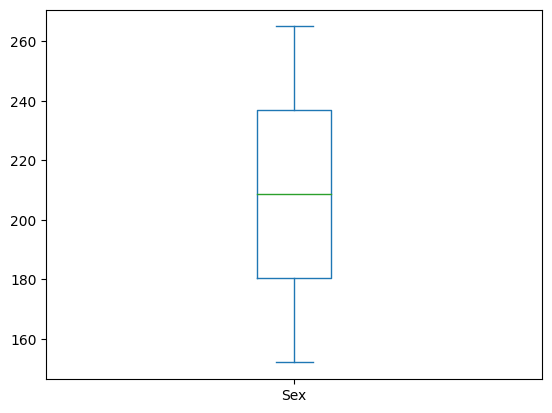

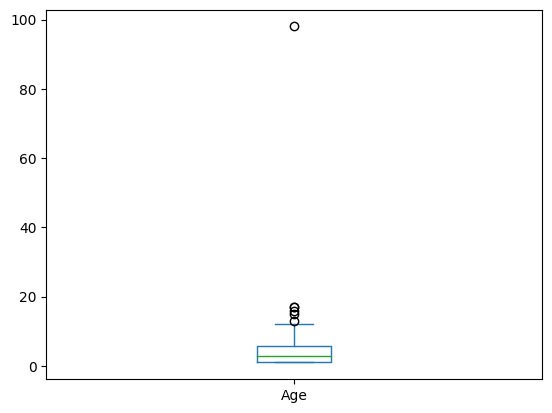

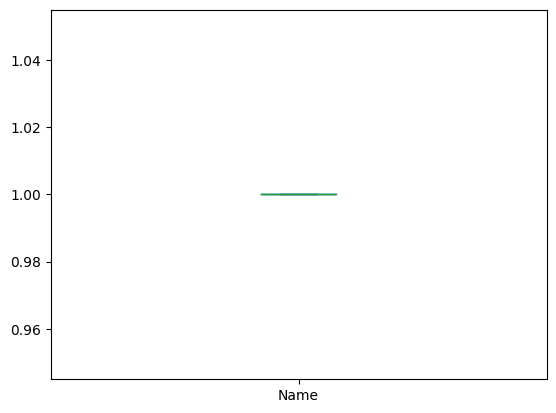

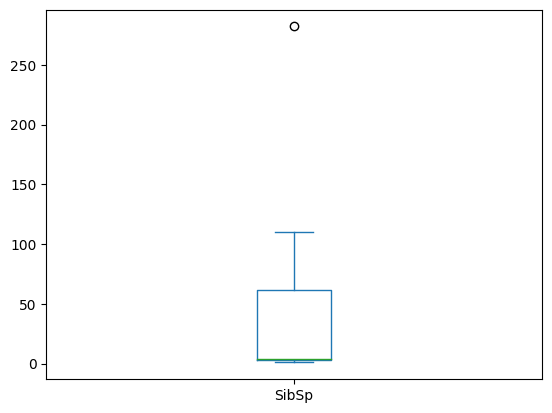

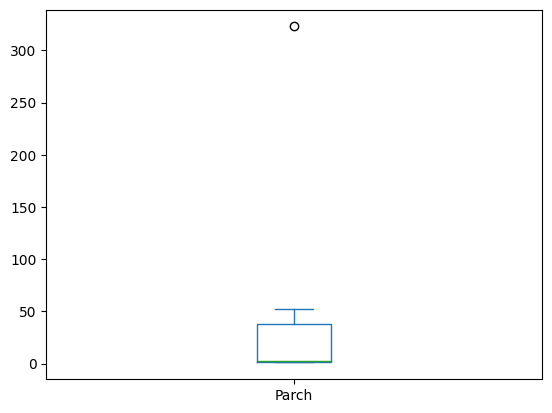

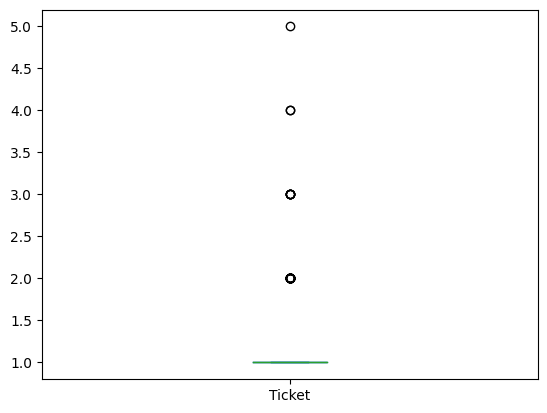

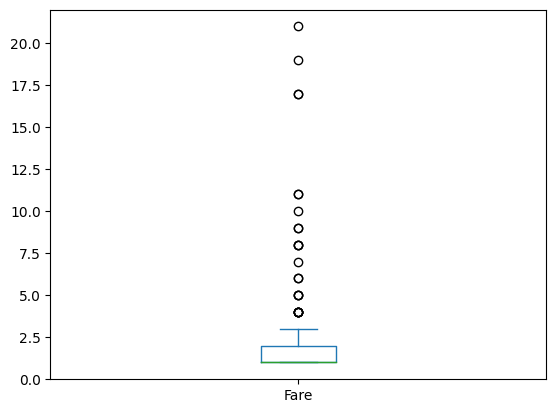

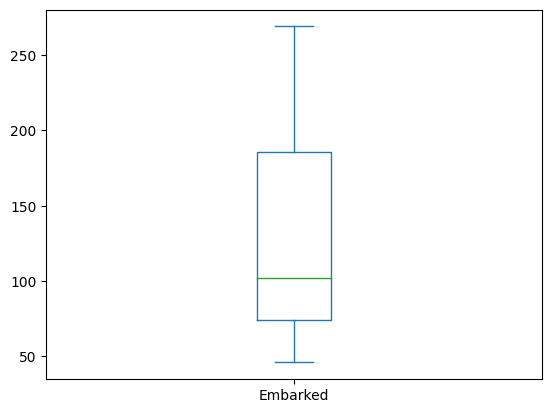

In [ ]:
# identify outilers by uding boxplot
data['PassengerId'].value_counts().plot(kind='box')
plt.show()
data['Pclass'].value_counts().plot(kind='box')
plt.show()
data['Sex'].value_counts().plot(kind='box')
plt.show()
data['Age'].value_counts().plot(kind='box')
plt.show()
data['Name'].value_counts().plot(kind='box')
plt.show()
data['SibSp'].value_counts().plot(kind='box')
plt.show()
data['Parch'].value_counts().plot(kind='box')
plt.show()
data['Ticket'].value_counts().plot(kind='box')
plt.show()
data['Fare'].value_counts().plot(kind='box')
plt.show()
data['Embarked'].value_counts().plot(kind='box')
plt.show()

In [ ]:
# removing outilers using IQR method
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3-Q1
lower_bound =Q1-1.5*IQR
upper_bound =Q3+1.5*IQR
data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


## Train Table

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
data1 = pd.read_csv(io.BytesIO(uploaded['train.csv']))
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# identify null vales
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# dealing with null vales
data1['Age'].fillna(data1['Age'].median(), inplace=True)
data1.dropna(subset=['Embarked'], inplace=True)
data1.drop(columns=['Cabin'], inplace=True)
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

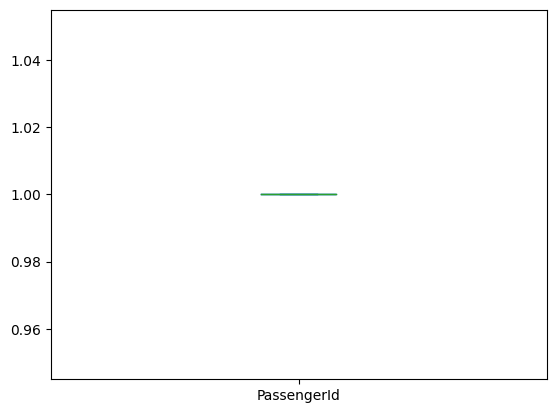

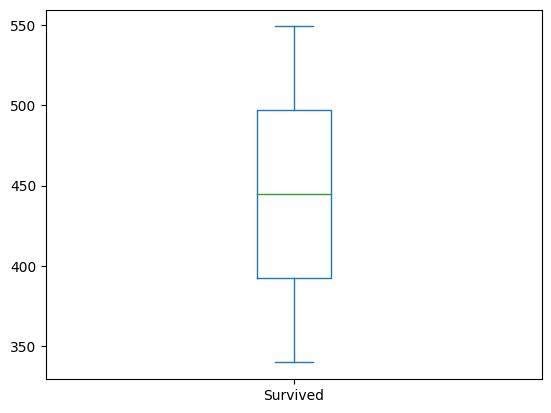

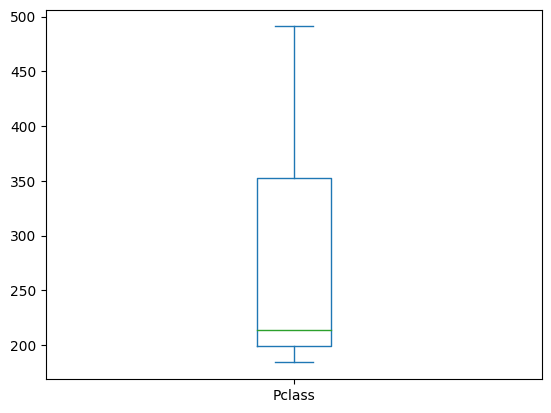

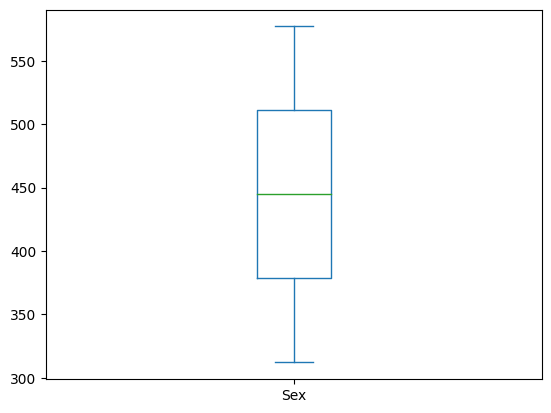

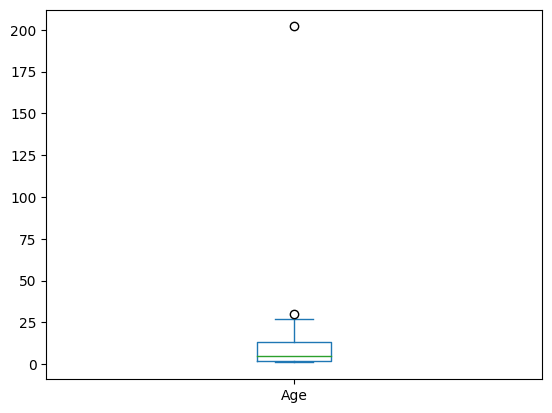

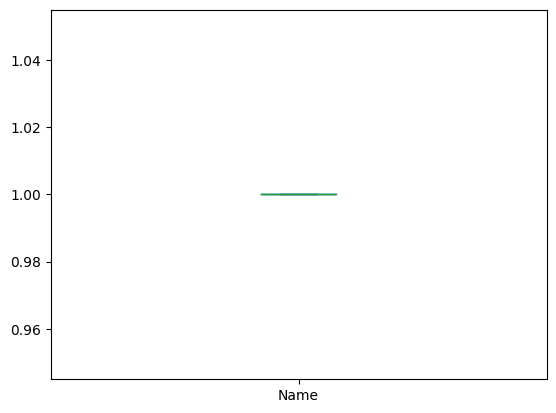

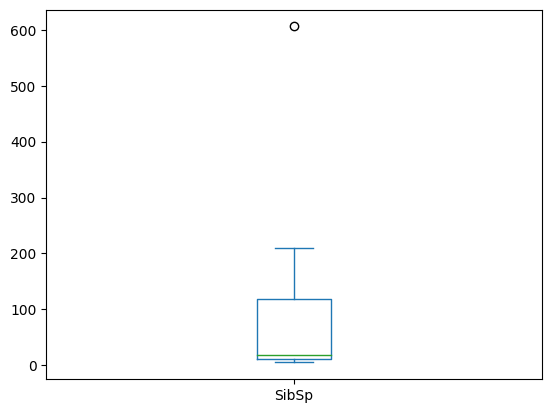

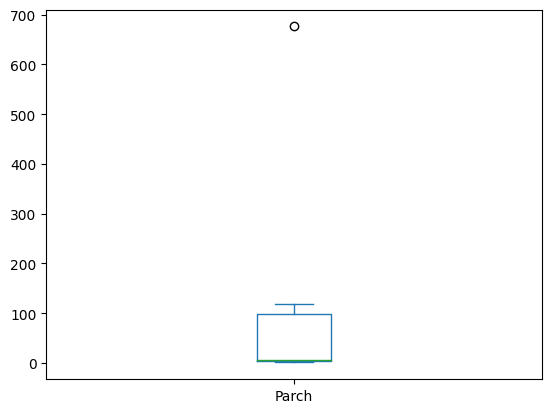

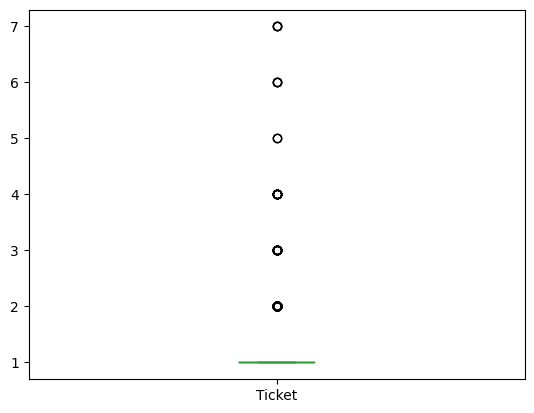

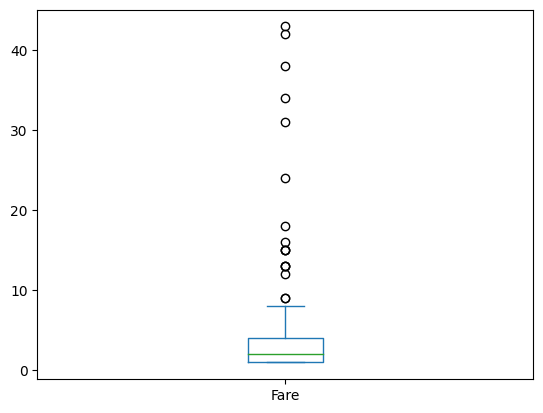

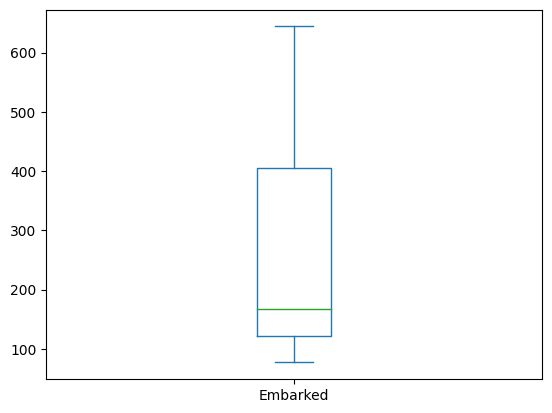

In [ ]:
# identify outilers by uding boxplot
data1['PassengerId'].value_counts().plot(kind='box')
plt.show()
data1['Survived'].value_counts().plot(kind='box')
plt.show()
data1['Pclass'].value_counts().plot(kind='box')
plt.show()
data1['Sex'].value_counts().plot(kind='box')
plt.show()
data1['Age'].value_counts().plot(kind='box')
plt.show()
data1['Name'].value_counts().plot(kind='box')
plt.show()
data1['SibSp'].value_counts().plot(kind='box')
plt.show()
data1['Parch'].value_counts().plot(kind='box')
plt.show()
data1['Ticket'].value_counts().plot(kind='box')
plt.show()
data1['Fare'].value_counts().plot(kind='box')
plt.show()
data1['Embarked'].value_counts().plot(kind='box')
plt.show()

In [ ]:
# removing outilers using IQR method
Q11 = data1['Fare'].quantile(0.25)
Q31 = data1['Fare'].quantile(0.75)
IQR1 = Q31-Q11
lower_bound1 =Q11-1.5*IQR1
upper_bound1 =Q31+1.5*IQR1
data1[(data1['Fare'] >= lower_bound1) & (data1['Fare'] <= upper_bound1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Task 1 is completed